In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# cholesky decomposition, naive implementation
def cholesky(A):
    n = A.shape[0]
    L = np.zeros(A.shape)
    for j in range(n): # loop over columns
        v_j_to_n = np.copy(A[j:, j]) # vector from j-th element to the end, size n-j
        for k in range(j):
            v_j_to_n -= L[j, k] * L[j:, k] # n-j vectors
        L[j:n, j] = v_j_to_n / np.sqrt(v_j_to_n[0])
    return L

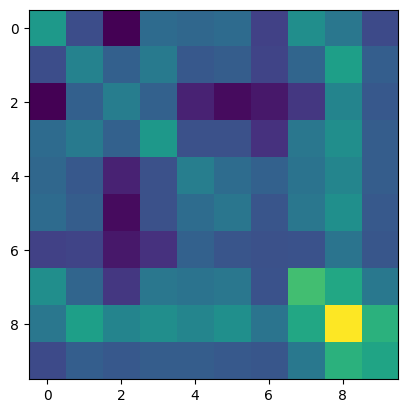

In [28]:
# generate a random positive definite matrix
n = 10
A = np.random.rand(n, n)
A = A @ A.T
plt.imshow(A)

In [29]:
# compute the cholesky decomposition
L = cholesky(A)

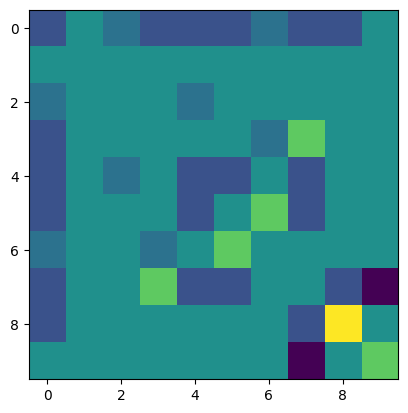

In [30]:
diffs = A - L @ L.T
# plot the difference between A and LL^T
plt.imshow(diffs)

In [31]:
# print the absolute difference (should be very small)
print(np.max(np.abs(diffs)))

8.881784197001252e-16


In [32]:
import numpy as np


def cholesky(A):
    n = A.shape[0]
    L = np.zeros(A.shape)
    for j in range(n):  # loop over columns
        v_j_to_n = A[j:, j].copy()  # vector from j-th element to the end, size n-j
        for k in range(j):
            v_j_to_n -= L[j:, k] * L[j, k]
        L[j, j] = np.sqrt(v_j_to_n[0])  # Diagonal element
        L[j + 1 :, j] = v_j_to_n[1:] / L[j, j]  # Off-diagonal elements
    return L


# Test the function
A = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]], dtype=float)
L = cholesky(A)
print("L:")
print(L)
print("\nL @ L.T:")
print(L @ L.T)
print("\nOriginal A:")
print(A)
print("\nDifference:")
print(np.abs(A - L @ L.T).max())

L:
[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]

L @ L.T:
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]

Original A:
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]

Difference:
0.0


In [34]:
np.abs(A - L @ L.T).max()

np.float64(0.0)